In [1]:
import pandas as pd
import bz2
import matplotlib.pyplot as plt
import dill as pickle
import numpy as np
from numpy import mean

In [2]:
def plotScens(xTime, yScens, yMean,ax=None, legend=0, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
        
    ci9 = np.quantile(yScens, 0.9, axis=0)
    ci975 = np.quantile(yScens, 0.975, axis=0)
    ci995 = np.quantile(yScens, 0.995, axis=0)
    ciMax = np.max(yScens,axis=0)
    ci1 = np.quantile(yScens, 0.1, axis=0)
    ci025 = np.quantile(yScens, 0.025, axis=0)
    ci005 = np.quantile(yScens, 0.005, axis=0)
    ciMin = np.min(yScens, axis=0)
    ax.fill_between(xTime, ci005, ci995, color='gray', alpha=.15)
    ax.fill_between(xTime, ci025, ci975, color='b', alpha=.2, label=r'CI $95\%$')
    ax.fill_between(xTime, ci1, ci9, color='b', alpha=.2)
    ax.fill_between(xTime, ciMin, ciMax,color='gray',alpha=0.07)
    ax.plot(xTime, yMean,'--b', label='Mean')
    #ax.plot(xTime,yFrcst,'-o',color='darkorange',linewidth=2,markersize=8,label='Forecast')
    #ax.plot(xTime, yMean,'--b', label='Mean')
    ax.set_xlim(left=-0.25,right=23.25)
    ax.set_xticks([0,6,12,18,24])
    ax.set_xticklabels(('0', '6', '12', '18', '24'), fontsize='13', horizontalalignment='right')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.grid(linewidth=0.25)
   
    if legend > 0:
        ax.legend(fontsize=12)
    #ax.plot(x, y, **plt_kwargs) ## example plot here
    return(ax)

In [3]:
from GenCostIntegrationScenario import *
from numpy import mean
def PlotingScenarios(time, WindScenarios,SolarScenarios, LoadScenarios):
    #, VaticOutput, LoadShedHour):
    WindMean=mean(WindScenarios)
    SolarMean=mean(SolarScenarios)
    LoadMean=mean(LoadScenarios)
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Wind-"+date,fontsize=15)
    ax = plotScens(time, WindScenarios, WindMean, ax=ax, legend=1)
    
    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Solar-"+date,fontsize=15)
    ax = plotScens(time, SolarScenarios, SolarMean, ax=ax)
 
    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Net Load-"+date,fontsize=15)
    ax = plotScens(time, LoadScenarios, LoadMean,ax=ax)
    
def PlotingVaticOutput(time, GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date):
    #GenerationCostAll=VaticOutput['GenerationCostAll']
    #LoadSheddingAll=VaticOutput['LoadSheddingAll']
    #RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    
    fig = plt.figure(figsize=(15,3))
    ax = fig.add_subplot(1,3,1)
    ax.set_ylabel("Generation Cost-"+date,fontsize=15)
    ax.hist(GenerationCostAll, bins=20, color='lightblue')
    #plt.xlim(0, 300000)
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,2)
    ax.set_ylabel("Load Shedding-"+date,fontsize=15)
    ax.hist(LoadSheddingAll, bins=25, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.ylim(0,100)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)

    ax = fig.add_subplot(1,3,3)
    ax.set_ylabel("Ren. Curtailment-"+date,fontsize=15)
    ax.hist(RenewableCurtailmentAll, bins=20, color='lightblue')
    plt.locator_params(axis="x", nbins=4)
    plt.grid(linewidth=0.25)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=12)
def PlotingRelationship1(time, WindScenarios,WindMean,SolarScenarios,SolarMean, LoadScenarios,LoadMean, date, showHist):

    DifferenceLoadWindSolar=LoadScenarios-WindScenarios-SolarScenarios
    Thresold=mean(DifferenceLoadWindSolar)
    HighGenCost, IntegrationScen, ax=GenCostIntegrationScen(DifferenceLoadWindSolar, Thresold, GenerationCostAll, RenewableCurtailmentAll, LoadSheddingAll, time,showHist=showHist)
    ax.set_xlabel("Net Load GWh",fontsize=13)

C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs

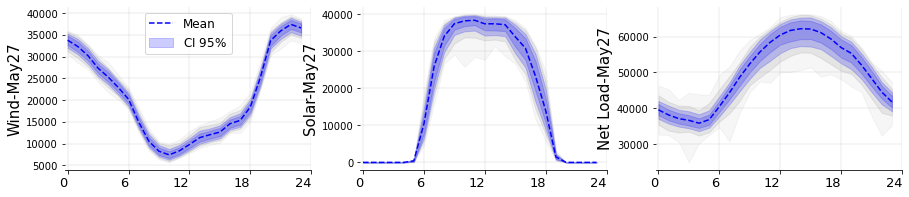

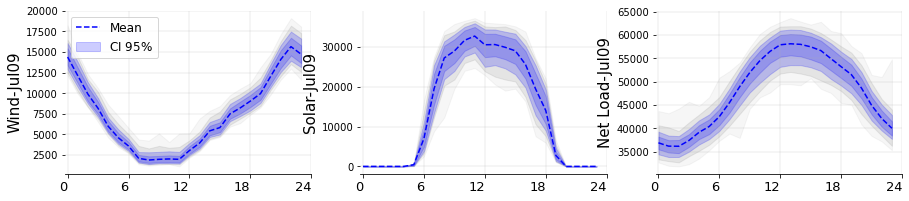

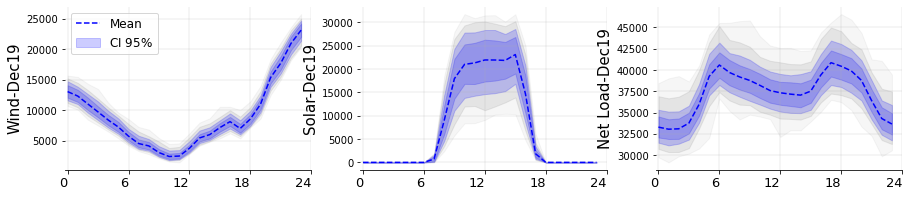

In [4]:
file_dir = "C:\\Users\\Mahashweta Patra\\Downloads\\ProcessedDataTexas\\"
for date in ["May27","Jul09","Dec19"]:
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    time= Mean['time']
    PlotingScenarios(time, WindScenarios,SolarScenarios, LoadScenarios)


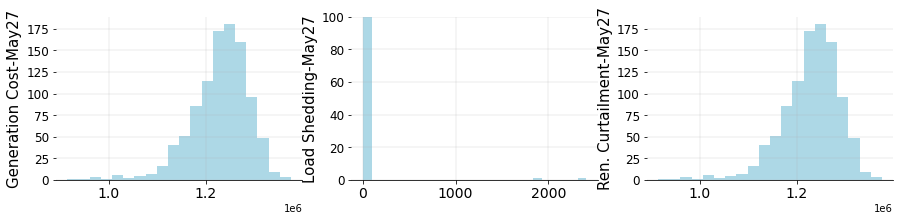

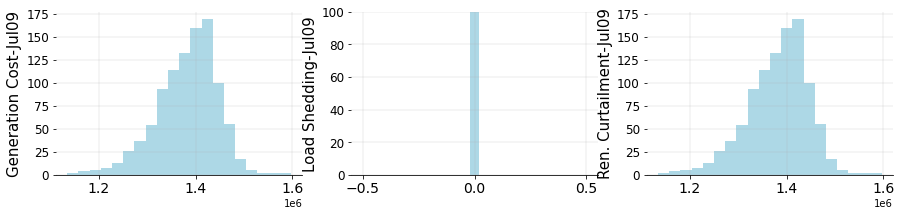

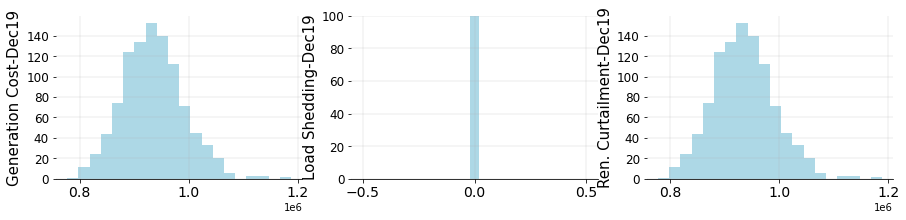

In [5]:
for date in ["May27","Jul09","Dec19"]:
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    time= Mean['time']
    PlotingVaticOutput(time,GenerationCostAll, LoadSheddingAll, RenewableCurtailmentAll, date)

C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Daily production GWh for the mean, 285102.9134167001


C:\Users\Mahashweta Patra\GenCostIntegrationScenario.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)
C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


check 1309178.9
Probability/2 29
Daily production GWh for the mean, 641747.3193116


C:\Users\Mahashweta Patra\GenCostIntegrationScenario.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)
C:\Users\Mahashweta Patra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3417: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


check 1468835.65
Probability/2 23
Daily production GWh for the mean, 502078.81652959995


C:\Users\Mahashweta Patra\GenCostIntegrationScenario.py:171: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_scatter.set_xticklabels(ax_scatter.get_xticks(), rotation = 90, fontsize=10)


check 1033691.7
Probability/2 20


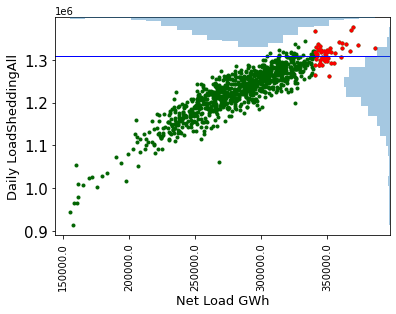

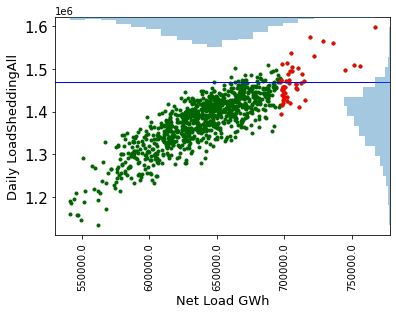

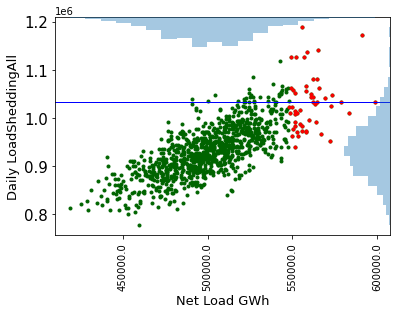

In [6]:
for date in ["May27","Jul09","Dec19"]:
    Mean = pd.read_csv(file_dir+date+"\\Mean.csv")
    WindScenarios = pd.read_csv(file_dir+date+"\\WindScenariosAggregated.csv")
    SolarScenarios=pd.read_csv(file_dir+date+"\\SolarScenariosAggregated.csv")
    LoadScenarios=pd.read_csv(file_dir+date+"\\LoadScenariosAggregated.csv")
    VaticOutput = pd.read_csv(file_dir+date+"\\VaticOutput.csv")
    time= Mean['time']
    GenerationCostAll=VaticOutput['GenerationCostAll']
    LoadSheddingAll=VaticOutput['LoadSheddingAll']
    RenewableCurtailmentAll=VaticOutput['RenewableCurtailmentAll']
    WindMean=mean(WindScenarios)
    SolarMean=mean(SolarScenarios)
    LoadMean=mean(LoadScenarios)
    GenerationCostAll=np.array(GenerationCostAll,int)
    PlotingRelationship1(time, WindScenarios,WindMean,SolarScenarios,SolarMean, LoadScenarios,LoadMean, date, True)